I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman. The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

###### Description of Variables
The dataset contains 6366 observations of 9 variables:
- rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
- age: woman's age
- yrs_married: number of years married
- children: number of children
- religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
- educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
- occupation: woman's occupation (1 = student, 2 = farming/semi-
- skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
- occupation_husb: husband's occupation (same coding as above)
- affairs: time spent in extra-marital affairs

###### Code to loading data and modules:

#### Data Preparation:

In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.cross_validation import train_test_split 
from sklearn import metrics 
from sklearn.cross_validation import cross_val_score 

In [22]:
dta = sm.datasets.fair.load_pandas().data
dta['affair'] = (dta.affairs > 0).astype(int)

In [27]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


#### Data Exploration:

In [28]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [29]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

Great ! There are no null values.

So, we can proceed to EDA !!

In [30]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

Let's take another look at the rate_marriage variable.


In [31]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


We can see that on average, women who have affairs rate their marriages lower, which is to be expected. 

It seems an increase in age, yrs_married, and children appears to correlate with a declining marriage rating.

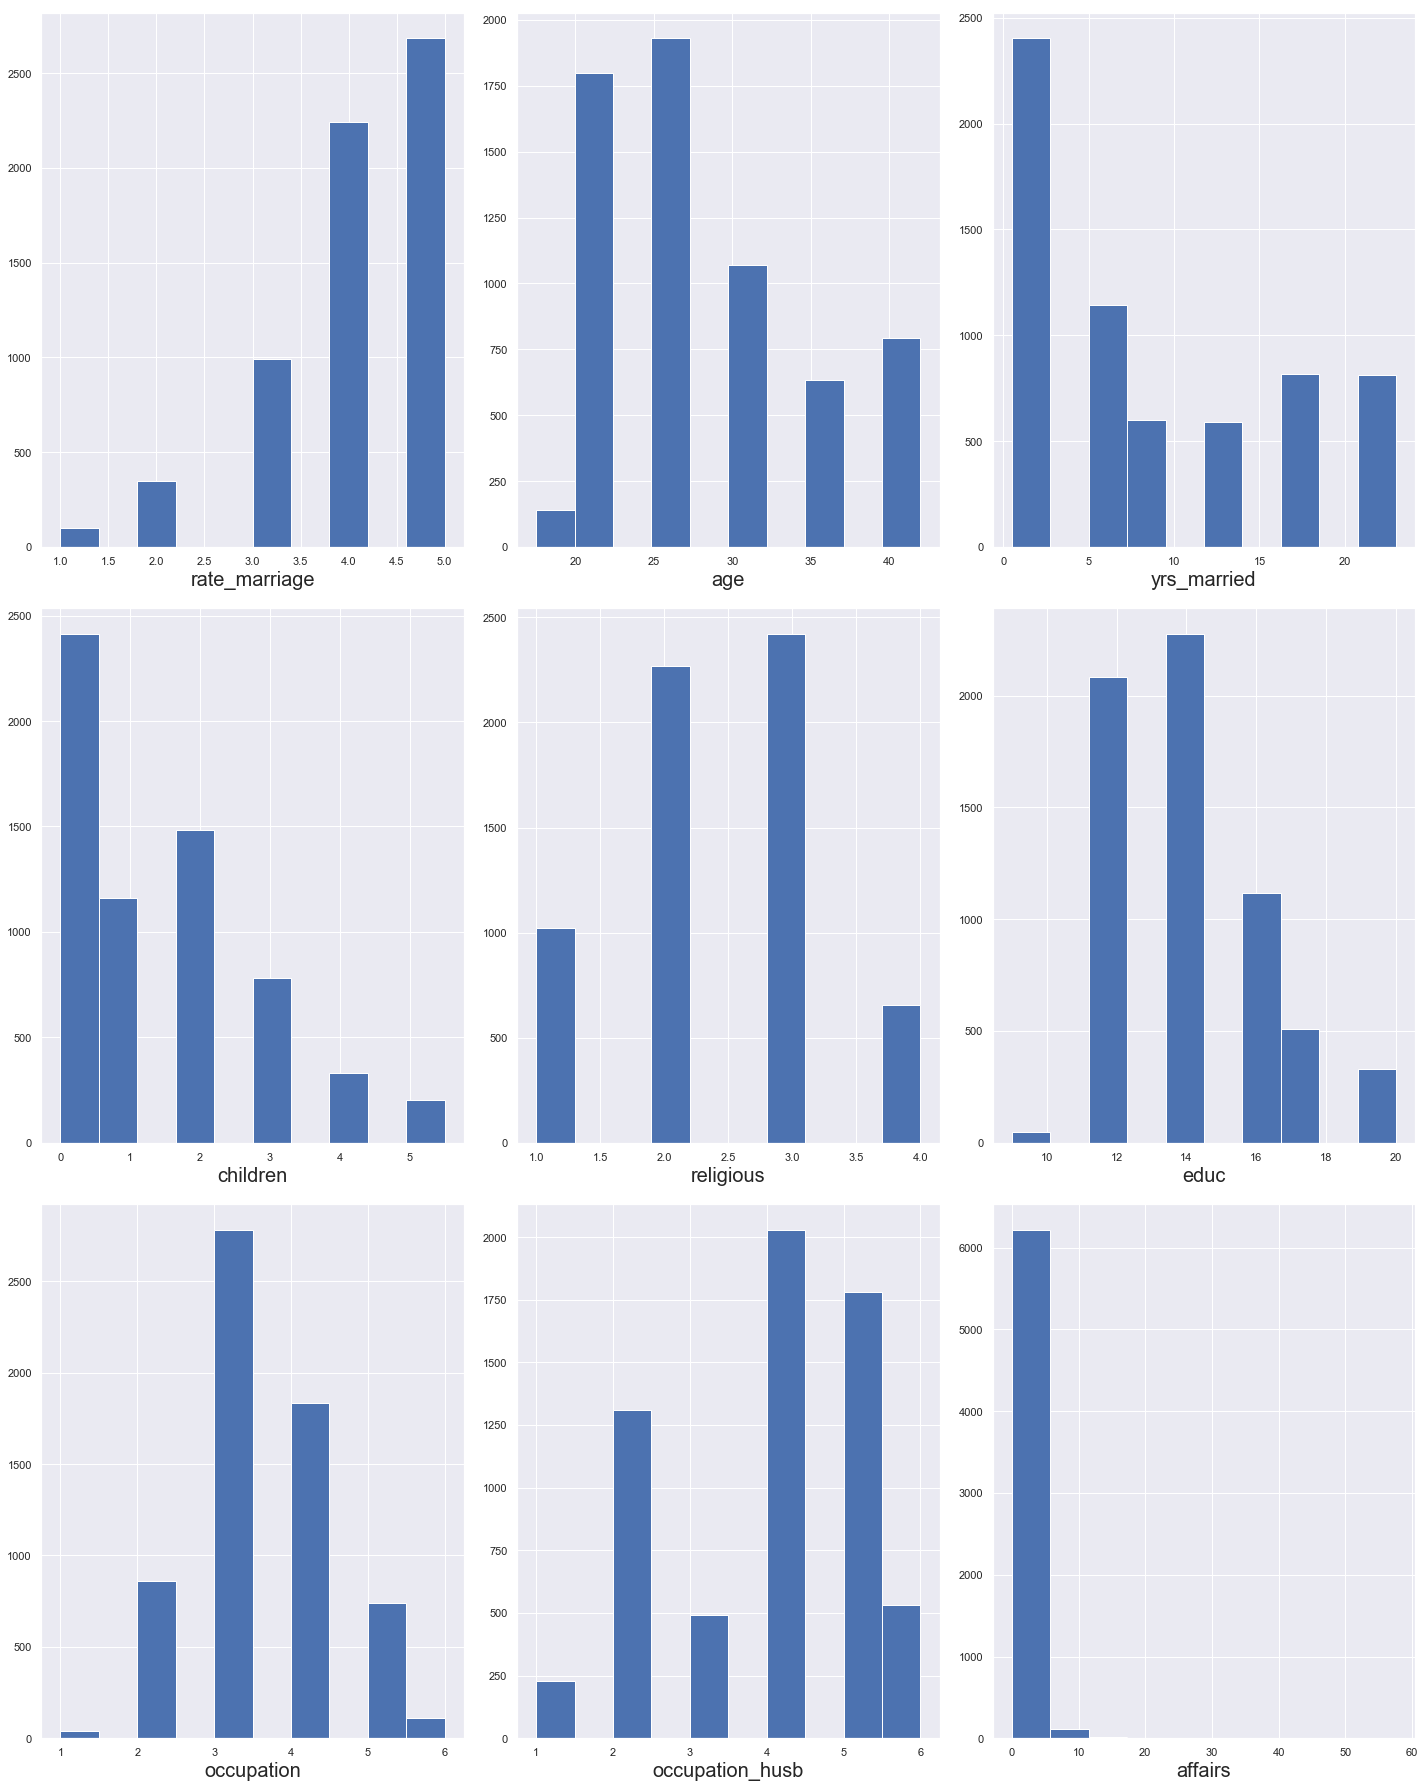

In [36]:
#Let's first see how our data is distributed

plt.figure(figsize = (20,25))

plotnum = 1

for col in dta.columns:
    
    if plotnum < 10:
        ax = plt.subplot(3,3,plotnum)
        plt.hist(dta[col])
        plt.xlabel(col,fontsize=20)
        
    plotnum+=1
    
plt.tight_layout()
plt.show()

There's not enough inferences that can bought out of these graphs as most of the features are categorical !

Let's take a look at the distribution of marriage ratings for those having affairs versus those not having affairs.

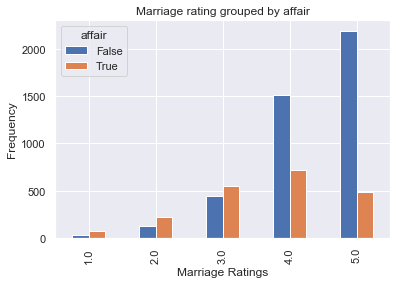

In [40]:
# Barplot of marriage ratings grouped by affairs(True or False)

pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind = 'bar')
plt.title("Marriage rating grouped by affair")
plt.xlabel("Marriage Ratings")
plt.ylabel("Frequency")
plt.show()

Let's use a stacked barplot to look at the percentage of women having affairs by number of years of marriage.

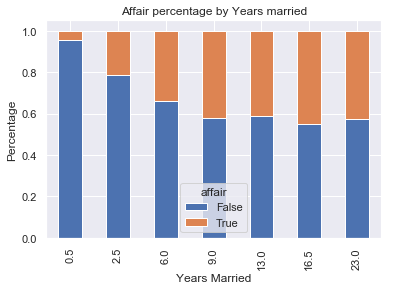

In [41]:
affairs_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affairs_yrs_married.div(affairs_yrs_married.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title("Affair percentage by Years married")
plt.xlabel("Years Married")
plt.ylabel("Percentage")
plt.show()

#### Model Preparation:

To prepare the data, I want to add an intercept column as well as dummy variables for occupation and occupation_husb, since I'm treating them as categorial variables. The dmatrices function from the patsy module can do that using formula language.

In [53]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

The column names for the dummy variables are ugly, so let's rename those.

In [54]:
# fix column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [56]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


We also need to flatten y into a 1-D array, so that scikit-learn will properly understand it as the response variable.

In [57]:
# flatten y into a 1-D array
y = np.ravel(y)

In [59]:
y

array([1., 1., 1., ..., 0., 0., 0.])

Let's go ahead and run logistic regression on the entire data set, and see how accurate it is!

In [61]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
# check the accuracy on the training set
model.score(X, y)

0.7258875274897895

We are getting 72.5% accuracy. What if we just predicted using the mean values of affair column:

In [63]:
y.mean()

0.3224945020420987

This means we could still get 68% accuracy by always predicting "NO". So, we have better accuracy than this but not by much.

In [66]:
# examine the coefficients
coeff_df = pd.DataFrame()
coeff_df['Columns'] = X.columns
coeff_df["Coefficients"] = np.transpose(model.coef_)

In [67]:
coeff_df

,Columns,Coefficients
0,Intercept,1.489836
1,occ_2,0.188066
2,occ_3,0.498948
3,occ_4,0.250669
4,occ_5,0.839008
5,occ_6,0.833908
6,occ_husb_2,0.190636
7,occ_husb_3,0.297833
8,occ_husb_4,0.161409
9,occ_husb_5,0.187771


From the above output we can say- Increase in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair

#### Model Evaluation Using a Validation Set-

let's first split our dataset into train and test data:

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [69]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
#Model accuracy on train data
model2.score(x_train, y_train)

0.7246661429693637

In [71]:
#Model accuracy on test data
model2.score(x_test, y_test)

0.7268445839874411

In [73]:
#Let's predict from our model:
predicted = model2.predict(x_test)
predicted

array([0., 0., 0., ..., 0., 0., 0.])

In [74]:
#Let's also predict the probabilities:
probs = model2.predict_proba(x_test)
probs

array([[0.67994765, 0.32005235],
       [0.5089767 , 0.4910233 ],
       [0.69900178, 0.30099822],
       ...,
       [0.74979239, 0.25020761],
       [0.5261225 , 0.4738775 ],
       [0.60748919, 0.39251081]])

 The classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

Now let's generate some evaluation metrics-

In [75]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.7268445839874411
0.7547938751472321


The accuracy is 73%, which is the same as we experienced when training and predicting on the same data.

We can also see the confusion matrix and a classification report with other metrics-

In [77]:
print(metrics.confusion_matrix(y_test, predicted))

[[758  91]
 [257 168]]


In [78]:
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

        0.0       0.75      0.89      0.81       849
        1.0       0.65      0.40      0.49       425

avg / total       0.71      0.73      0.71      1274



Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [83]:
scores = cross_val_score(LogisticRegression(), X, y, scoring = 'accuracy', cv = 10)
print(scores)
print(scores.mean())

[0.72100313 0.70219436 0.73824451 0.70597484 0.70597484 0.72955975
 0.7327044  0.70440252 0.75157233 0.75      ]
0.7241630685514876


##### Looks good. It's still performing at 73% accuracy. So our model is ready for prediction!

# Done !